In [1]:
import pandas as pd
import os
import numpy as np

os.chdir("app/")
from app.visualization import plot_multiple_images, read_image
from app.CLIP import CLIPOpenAI
print("loading finished")

/Users/lran/opt/anaconda3/envs/cs324/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loading finished


## Visualize Sample Images

In [2]:
data_dir = "/Users/lran/Downloads/imagenet_samples/"
# data_dir = "/media/ssd1/ivan/datasets/imagenet_samples/"
csv_name = "0010_samples.csv"

In [3]:
df_samples = pd.read_csv(os.path.join(data_dir, csv_name))
df_samples.head(2)

,image_path,class_name
0,images/n03447447_10247.JPEG,gondola
1,images/n03954731_19743.JPEG,plane


In [4]:
# for convenience, I will load all images in memory and store them in a new column
df_samples["image_path"] = df_samples["image_path"].apply(lambda x: os.path.join(data_dir, x))
df_samples["image"] = df_samples["image_path"].apply(read_image)

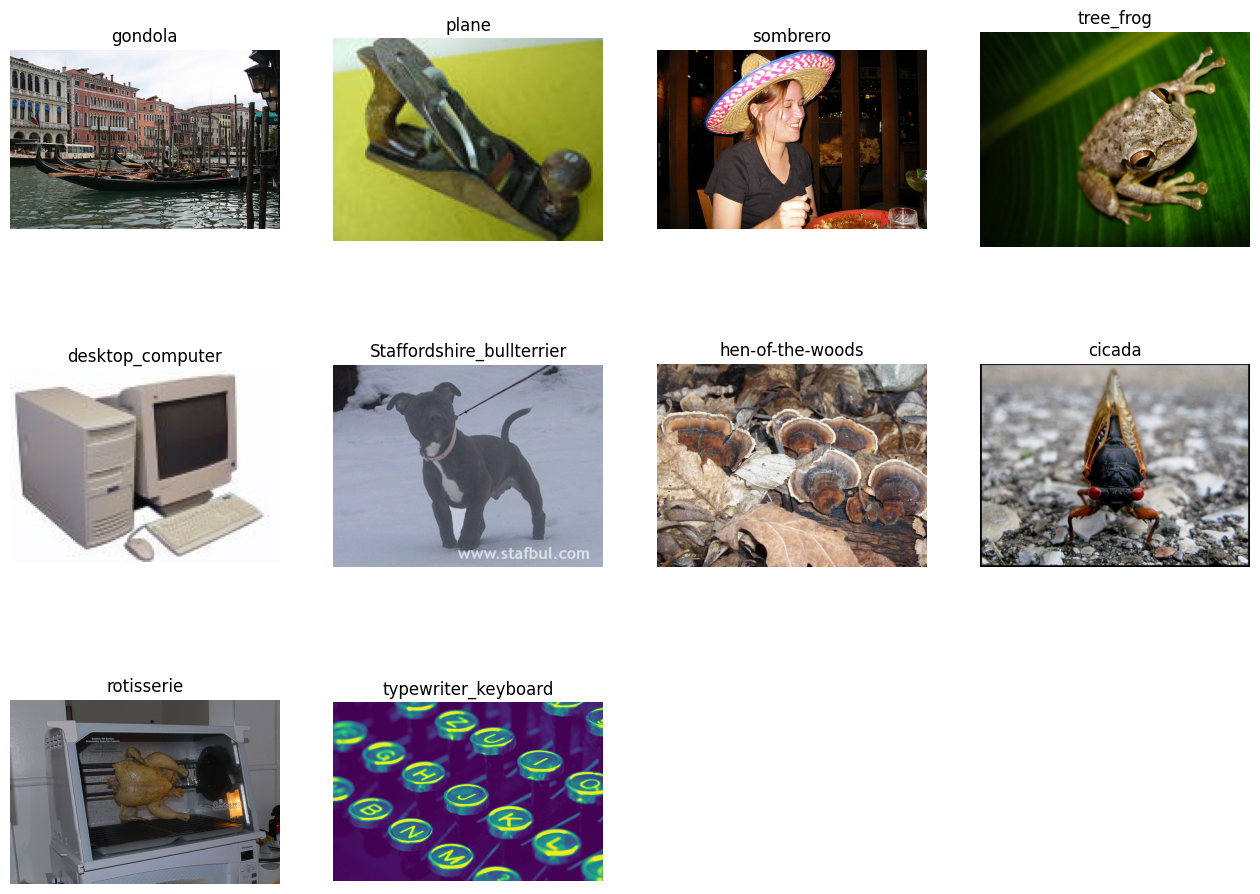

In [5]:
plot_multiple_images(images=df_samples["image"].values, titles=df_samples["class_name"].values)

## Calculate Similarity Score with Open CLIP

In [6]:
model = CLIPOpenAI()

In [7]:
images = df_samples["image"].values

<class 'torch.Tensor'>


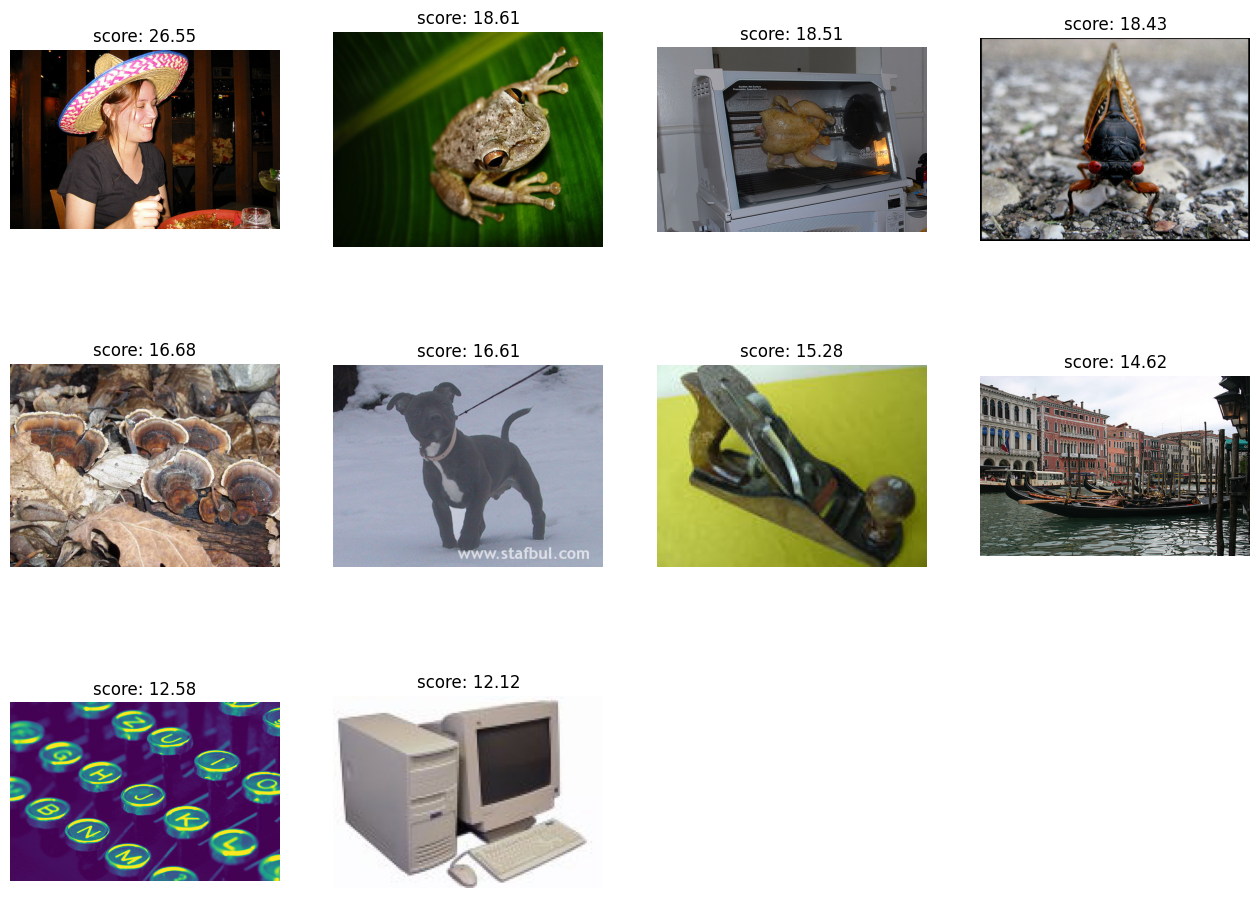

In [8]:
query = "I wear a hat and eating food"
scores = model.get_similarity_scores(df_samples.image_path, query)
sorted_indices = np.argsort(scores)[::-1][:len(scores)]
scores_sorted = scores[sorted_indices]
images_sorted = images[sorted_indices]
titles = [f"score: {score:.2f}" for score in scores_sorted]
plot_multiple_images(images=images_sorted, titles=titles)